In [50]:
# Import required libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [52]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [53]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [54]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']  # Replace with your column names

# 3. Extract the data you want to normalize
data_to_normalize = df_market_data[columns_to_normalize]

# 4. Initialize the StandardScaler and fit it to your data
scaler = StandardScaler()
scaler.fit(data_to_normalize)

# 5. Transform the data using the fitted scaler
normalized_data = scaler.transform(data_to_normalize)

# Replace the original columns with the normalized data
df_market_data[columns_to_normalize] = normalized_data

# Now data contains the normalized values

In [55]:
# Create a DataFrame with the scaled data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [56]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [57]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data and compute the inertia
    kmeans.fit(df_market_data)  # Replace 'data' with your data
    inertia = kmeans.inertia_
    
    # Append the inertia value to the list
    inertia_values.append(inertia)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [58]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)




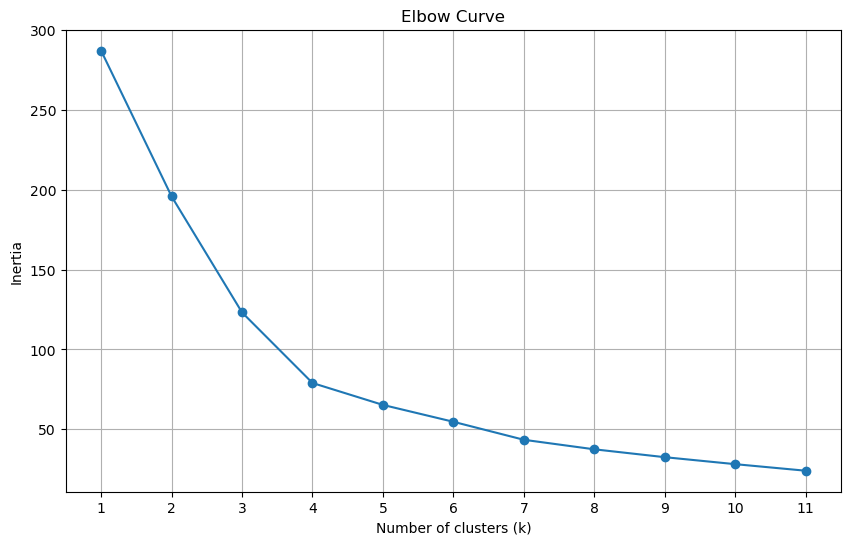

In [59]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:4** 


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [60]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace this with the value of k you identified as the best

best_kmeans = KMeans(n_clusters=best_k, random_state=42)



In [61]:
# Fit the K-Means model using the scaled data
best_kmeans.fit(df_market_data)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [62]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = best_kmeans.predict(df_market_data)  

# Print the resulting array of cluster values
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [63]:
# Create a copy of the DataFrame
data_with_clusters = df_market_data.copy()

In [64]:
# Add a new column to the DataFrame with the predicted clusters
data_with_clusters['Cluster'] = clusters

# Display sample data
print(data_with_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [65]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = data_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap='Category10',  # Choose a colormap for coloring points
    hover_cols=["name"],
    width=800,
    height=600,
    title="Cryptocurrency Clusters"
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [66]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [67]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca_model.fit_transform(df_market_data)

# View the first five rows of the DataFrame
print(pca_result[:5])



[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [68]:
# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Explained variance for Principal Component {i+1}: {variance:.2%}")

Explained variance for Principal Component 1: 37.20%
Explained variance for Principal Component 2: 34.70%
Explained variance for Principal Component 3: 17.60%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:See above** 

In [69]:
# Pull data names that are not indexed
non_indexed_names = df_market_data.index.tolist()

# Display the non-indexed data names
print(non_indexed_names)

['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte']


In [70]:
# Combine the PCA results with other relevant information
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['Name'] = non_indexed_names  # Assuming 'name' is the column containing cryptocurrency names

# Set the coinid column as index
pca_df.set_index('Name', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
Name                                      
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [71]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [72]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data and compute the inertia
    kmeans.fit(pca_df)  # Replace 'data' with your data
    inertia = kmeans.inertia_
    
    # Append the inertia value to the list
    inertia_values.append(inertia)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [73]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

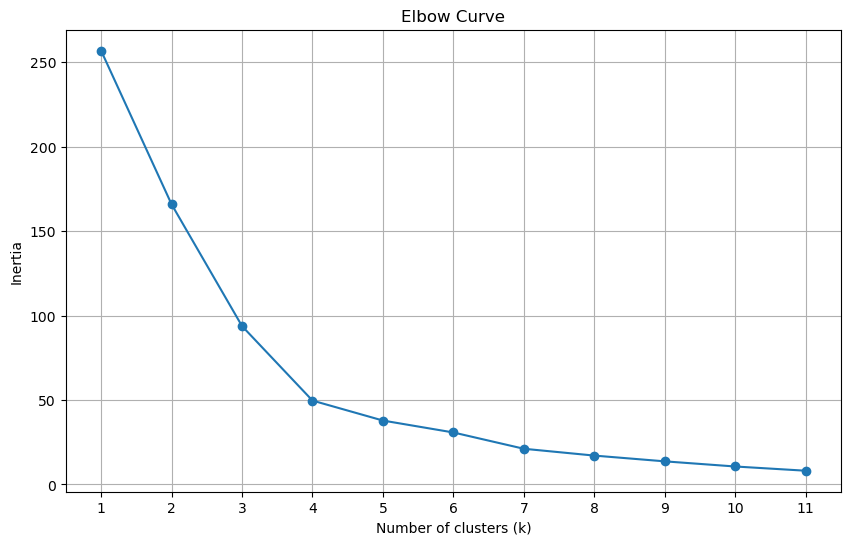

In [74]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4 or 5**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:This does differ because i am more inclined to use cluster 5 instead of 4** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
best_k = 5  # Replace this with the value of k you identified as the best


best_kmeans = KMeans(n_clusters=best_k, random_state=42)

In [76]:
# Fit the K-Means model using the PCA data
best_kmeans.fit(pca_df)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [77]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = best_kmeans.predict(pca_df)  

# Print the resulting array of cluster values
print(clusters)

[0 0 1 1 0 0 0 0 0 1 4 1 1 0 1 0 4 1 0 1 1 0 1 1 1 1 1 4 0 4 1 1 2 1 4 1 3
 4 1 1 1]


In [78]:
# Create a copy of the DataFrame with the PCA data
data_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
data_with_clusters['Cluster'] = clusters

# Display sample data
print(data_with_clusters.head())

                   PC1       PC2       PC3  Cluster
Name                                               
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        1
ripple       -0.471835 -0.222660 -0.479053        1
bitcoin-cash -1.157800  2.041209  1.859715        0


In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    cmap='Category10',  # Choose a colormap for coloring points
    hover_cols=["Name"],
    width=800,
    height=600,
    title="Cryptocurrency Clusters (PCA)"
)

# Display the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,Name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [80]:
# Composite plot to contrast the Elbow curves
# Create a DataFrame for the Elbow curve data
elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_values})

# Create a line plot for the Elbow curve
elbow_curve = elbow_df.hvplot.line(
    x='k',
    y='inertia',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    title='Elbow Curve for Cryptocurrency Clustering',
    width=600,
    height=400
)

# Display the Elbow curve
elbow_curve

:Curve   [k]   (inertia)

In [84]:
# Composite plot to contrast the clusters

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 